In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import os
import random
from IPython.display import  Image, display

import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split


In [ ]:
train_images_path = '/content/train'
test_images_path = '/content/test'

In [ ]:
labels_df = pd.read_csv("/content/gdrive/MyDrive/labels.csv")
labels_df.head()


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_df.describe()


id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [ ]:
def is_images_same(target_dir, target_df):
    """
    That function going to check images in target_dir are equal to
    image list in target_df
    """
    len_target_dir = len(os.listdir(target_dir))
    len_target_df = len(target_df)
    if len_target_dir == len_target_df:
        print(f"Both are having same no of images:{len_target_dir}")
    else:
        print(f"Target dir having {len_target_dir} images while Target DF having {len_target_df}")

is_images_same(target_dir = train_images_path, target_df = labels_df)

Both are having same no of images:10222


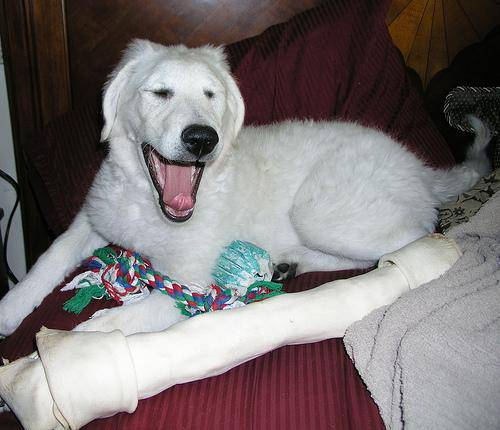

In [ ]:
from IPython.display import  Image, display
import random

example = random.choice(os.listdir(train_images_path))
example = train_images_path + "/" + example

Image(example)


In [ ]:
labels_df.columns


Index(['id', 'breed'], dtype='object')

Average Images per breed:85
Total no of breeds:120


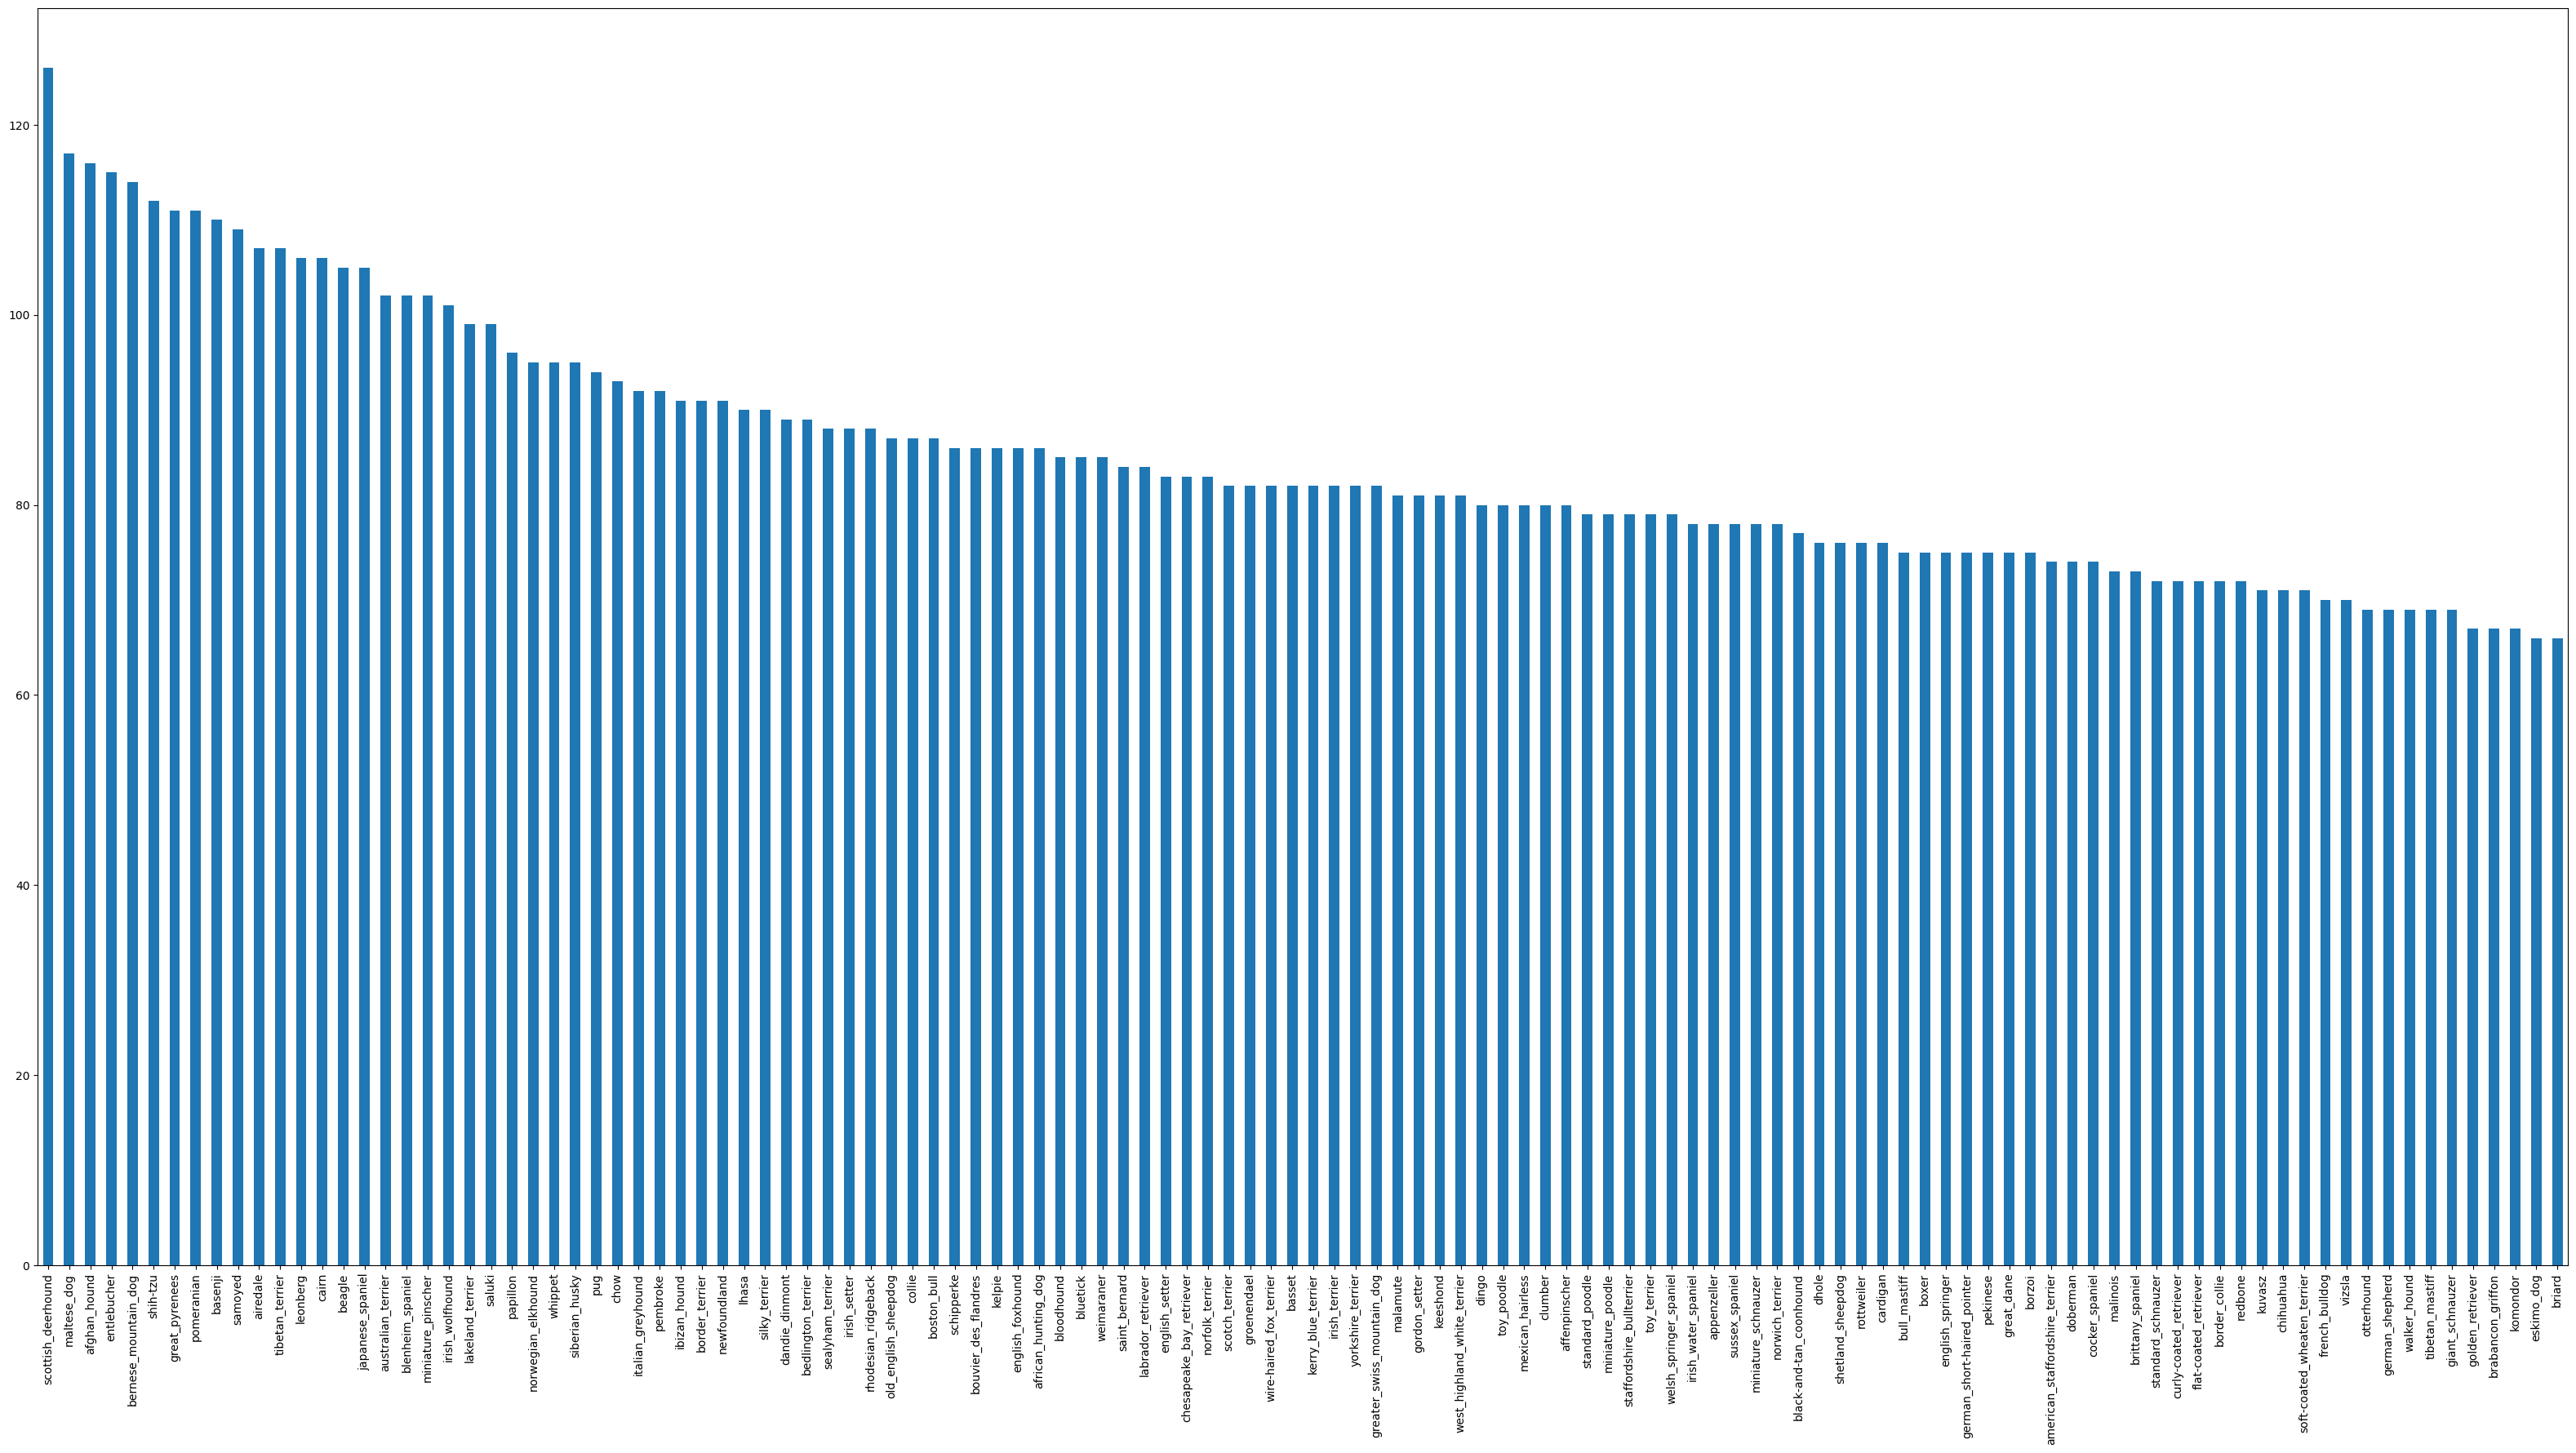

In [ ]:
labels_df["breed"].value_counts().plot.bar(figsize=(40,20))
print(f"Average Images per breed:{int(labels_df['breed'].value_counts().sum()/len(labels_df['breed'].unique()))}")
print(f"Total no of breeds:{len(labels_df['breed'].unique())}")


In [ ]:
fileNames = [train_images_path + "/" + fName + ".jpg" for fName in labels_df["id"]]
fileNames[:10]

['/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
classNames = labels_df["breed"].unique()
classNames[:5]

target_labels = [breed for breed in labels_df["breed"]]
target_labels_encoded = [label == np.array(classNames) for label in target_labels]


In [ ]:
NUM_IMAGE = 2000

X_train, X_val, Y_train, Y_val = train_test_split(fileNames[:NUM_IMAGE], target_labels_encoded[:NUM_IMAGE], test_size=0.2, random_state=42)
len(X_train), len(X_val), len(Y_train), len(Y_val)

(1600, 400, 1600, 400)

In [ ]:
X_train[0], Y_train[0]


('/content/train/17c5e8815cf0d086090a07b003b9b036.jpg',
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,

Image shape: (430, 500, 3)


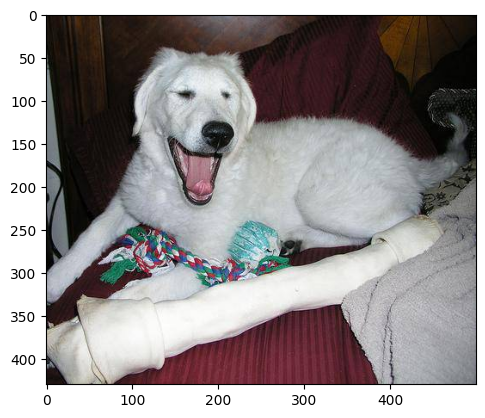

In [ ]:
img = imread(example)
plt.imshow(img)
print(f"Image shape: {img.shape}")


In [ ]:
tf.constant(img)

<tf.Tensor: shape=(430, 500, 3), dtype=uint8, numpy=
array([[[ 33,  28,  22],
        [ 32,  27,  21],
        [ 23,  18,  12],
        ...,
        [ 23,  18,  15],
        [ 23,  18,  15],
        [ 23,  18,  15]],

       [[ 33,  28,  22],
        [ 32,  27,  21],
        [ 23,  18,  12],
        ...,
        [ 21,  16,  13],
        [ 21,  16,  13],
        [ 21,  16,  13]],

       [[ 32,  27,  21],
        [ 32,  27,  21],
        [ 24,  19,  13],
        ...,
        [ 15,  10,   7],
        [ 15,  10,   7],
        [ 15,  10,   7]],

       ...,

       [[ 31,  21,  20],
        [ 30,  22,  20],
        [ 31,  21,  20],
        ...,
        [111, 114, 123],
        [109, 112, 121],
        [109, 112, 121]],

       [[ 33,  21,  21],
        [ 32,  22,  21],
        [ 33,  21,  21],
        ...,
        [111, 114, 123],
        [110, 113, 122],
        [107, 110, 119]],

       [[ 33,  21,  21],
        [ 33,  21,  21],
        [ 33,  21,  21],
        ...,
        [114, 117, 12

In [ ]:
tf.image.convert_image_dtype(img, tf.float32)


<tf.Tensor: shape=(430, 500, 3), dtype=float32, numpy=
array([[[0.12941177, 0.10980393, 0.08627451],
        [0.1254902 , 0.10588236, 0.08235294],
        [0.09019608, 0.07058824, 0.04705883],
        ...,
        [0.09019608, 0.07058824, 0.05882353],
        [0.09019608, 0.07058824, 0.05882353],
        [0.09019608, 0.07058824, 0.05882353]],

       [[0.12941177, 0.10980393, 0.08627451],
        [0.1254902 , 0.10588236, 0.08235294],
        [0.09019608, 0.07058824, 0.04705883],
        ...,
        [0.08235294, 0.0627451 , 0.0509804 ],
        [0.08235294, 0.0627451 , 0.0509804 ],
        [0.08235294, 0.0627451 , 0.0509804 ]],

       [[0.1254902 , 0.10588236, 0.08235294],
        [0.1254902 , 0.10588236, 0.08235294],
        [0.09411766, 0.07450981, 0.0509804 ],
        ...,
        [0.05882353, 0.03921569, 0.02745098],
        [0.05882353, 0.03921569, 0.02745098],
        [0.05882353, 0.03921569, 0.02745098]],

       ...,

       [[0.12156864, 0.08235294, 0.07843138],
        [0.11

In [ ]:
IMAGE_SIZE = 224

def process_image(image_path):
    img = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    img = tf.io.decode_image(img, channels =3)
    # Convert the colour channel values from 0-225 values to 0-1 values
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to our desired size (224, 244)
    img = tf.image.resize_with_crop_or_pad(img, 224, 224)
    return img

In [ ]:
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

get_image_label(X_train[10], Y_train[10])


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.37254903, 0.5764706 , 0.19215688],
         [0.36862746, 0.56078434, 0.20392159],
         [0.3372549 , 0.50980395, 0.20000002],
         ...,
         [1.        , 0.92549026, 0.3647059 ],
         [0.9843138 , 0.909804  , 0.36862746],
         [1.        , 0.9450981 , 0.43921572]],
 
        [[0.34901962, 0.52156866, 0.14117648],
         [0.3254902 , 0.49411768, 0.13333334],
         [0.37647063, 0.5411765 , 0.21176472],
         ...,
         [0.69411767, 0.6745098 , 0.18039216],
         [0.7803922 , 0.7568628 , 0.28627452],
         [0.7411765 , 0.7254902 , 0.29411766]],
 
        [[0.30980393, 0.4666667 , 0.09019608],
         [0.34509805, 0.5058824 , 0.13725491],
         [0.4156863 , 0.5803922 , 0.24313727],
         ...,
         [0.40784317, 0.43137258, 0.01568628],
         [0.5372549 , 0.5568628 , 0.16470589],
         [0.38431376, 0.41176474, 0.04705883]],
 
        ...,
 
        [[0.56078434, 0.7607844 

In [ ]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data= False, test_data=False):
    if test_data:
        test_data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        test_data = test_data.map(process_image).batch(BATCH_SIZE)
        return test_data

    if valid_data:
        valid_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        valid_data = valid_data.map(get_image_label).batch(BATCH_SIZE)
        return valid_data

    #shuffle and create training data
    else:
        train_data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))).shuffle(buffer_size = len(X))
        train_data = train_data.map(get_image_label).batch(BATCH_SIZE)
        return train_data

In [ ]:
train_data = create_data_batches(X_train, Y_train)
valid_data = create_data_batches(X_val, Y_val, valid_data=True)

In [ ]:
sample = next(iter(train_data))
sample[0][0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.882353  , 0.85098046, 0.8000001 ],
        [0.8980393 , 0.8705883 , 0.8078432 ],
        [0.8588236 , 0.8313726 , 0.7686275 ],
        ...,
        [0.75294125, 0.6666667 , 0.5058824 ],
        [0.7372549 , 0.64705884, 0.48235297],
        [0.69411767, 0.5882353 , 0.41960788]],

       [[0.882353  , 0.854902  , 0.79215693],
        [0.86666673, 0.83921576, 0.77647066],
        [0.8352942 , 0.8078432 , 0.7372549 ],
        ...,
        [0.7411765 , 0.6666667 , 0.50980395],
        [0.7254902 , 0.6392157 , 0.4784314 ],
        [0.7137255 , 0.6156863 , 0.454902  ]],

       [[0.8862746 , 0.85098046, 0.79215693],
        [0.8588236 , 0.8235295 , 0.76470596],
        [0.8313726 , 0.7960785 , 0.7294118 ],
        ...,
        [0.74509805, 0.68235296, 0.5411765 ],
        [0.75294125, 0.68235296, 0.53333336],
        [0.79215693, 0.7058824 , 0.5529412 ]],

       ...,

       [[0.98823535, 0.9921569 , 0.9686275 ],
        [1.  

In [ ]:
def show_images(images, label):
    plt.figure(figsize = (12,12))

    for i in range(0,16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i])
        plt.title(classNames[tf.argmax(label[i])])
        plt.axis("off")

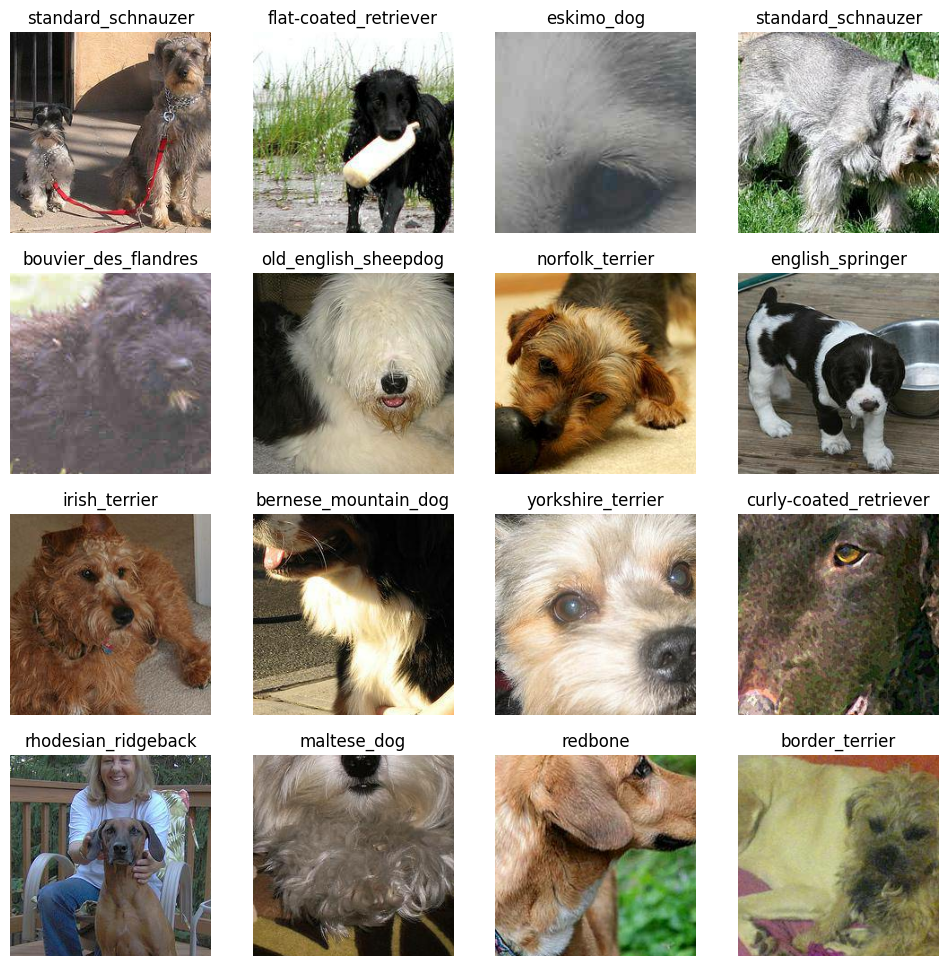

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)


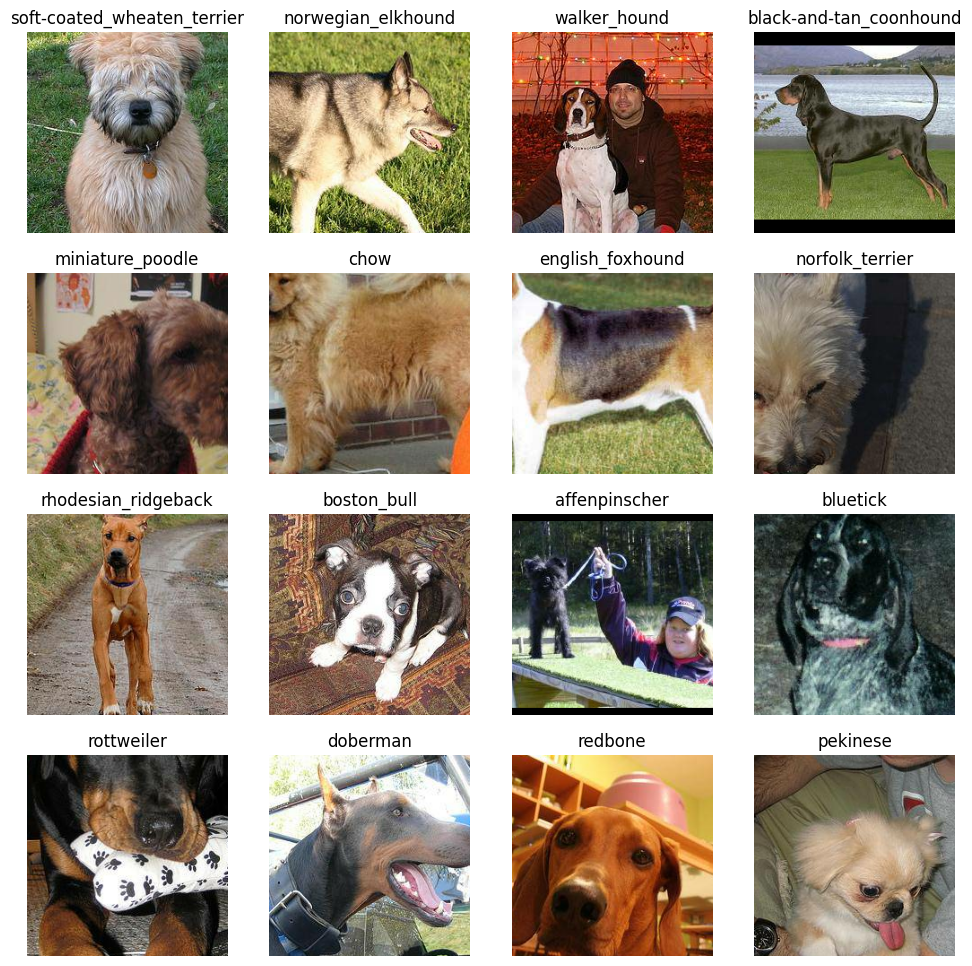

In [ ]:
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_images(val_images, val_labels)

In [ ]:
from keras import layers

def create_model():
    base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                     classes = len(classNames))
    base_model.trainable = False

    inputs = layers.Input(shape = (224,224,3))
    x = base_model(inputs, training = False)
    x = tf.keras.layers.GlobalAveragePooling2D(name= "global_average_pooling")(x)
    x = layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(len(classNames), activation="softmax")(x)


    ModelDogBreed = tf.keras.Model(inputs, outputs)

    ModelDogBreed.compile(loss = "categorical_crossentropy",
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])
    return ModelDogBreed

In [ ]:
model = create_model()

EarlyStoppingCallbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, baseline=None, restore_best_weights=True
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
ModelDogBreed_History = model.fit(train_data,
                                         steps_per_epoch = len(train_data),
                                         epochs = 10,
                                         validation_data= valid_data,
                                         validation_steps = len(valid_data),
                                         callbacks = [EarlyStoppingCallbacks])

Epoch 1/10
50/50 [==============================] - 91s 2s/step - loss: 4.1781 - accuracy: 0.1238 - val_loss: 2.7396 - val_accuracy: 0.3750
Epoch 2/10
50/50 [==============================] - 82s 2s/step - loss: 1.7599 - accuracy: 0.6112 - val_loss: 1.9237 - val_accuracy: 0.5250
Epoch 3/10
50/50 [==============================] - 87s 2s/step - loss: 0.9684 - accuracy: 0.8275 - val_loss: 1.6229 - val_accuracy: 0.5950
Epoch 4/10
50/50 [==============================] - 85s 2s/step - loss: 0.6118 - accuracy: 0.9019 - val_loss: 1.5650 - val_accuracy: 0.5800
Epoch 5/10
50/50 [==============================] - 87s 2s/step - loss: 0.4205 - accuracy: 0.9538 - val_loss: 1.4892 - val_accuracy: 0.6000
Epoch 6/10
50/50 [==============================] - 86s 2s/step - loss: 0.3069 - accuracy: 0.9756 - val_loss: 1.4150 - val_accuracy: 0.6100
Epoch 7/10
50/50 [==============================] - 84s 2s/step - loss: 0.2264 - accuracy: 0.9875 - val_loss: 1.4248 - val_accuracy: 0.6125
Epoch 8/10
50/50 [==

In [ ]:
model = create_model()

EarlyStoppingCallbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, baseline=None, restore_best_weights=True
)

In [ ]:
model.evaluate(valid_data)


13/13 [==============================] - 18s 1s/step - loss: 5.1601 - accuracy: 0.0150


[5.1601243019104, 0.014999999664723873]

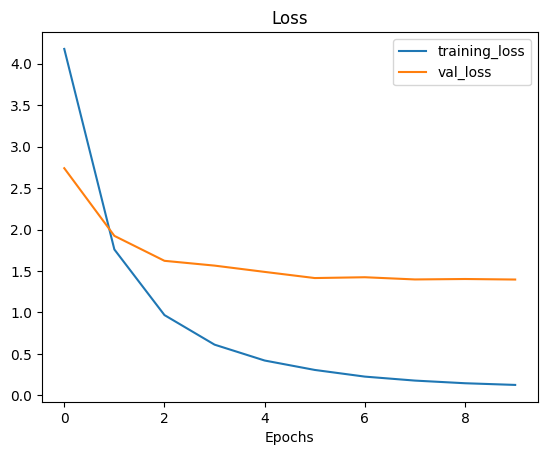

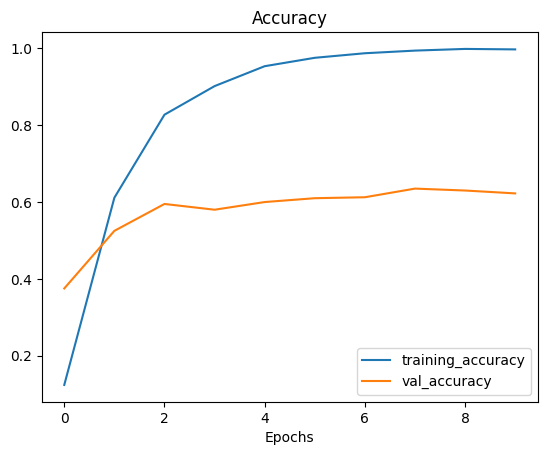

In [ ]:
history = ModelDogBreed_History

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

In [ ]:
predictions = model.predict(valid_data)
predictions


13/13 [==============================] - 17s 1s/step


array([[0.00455823, 0.01249224, 0.00194192, ..., 0.00397286, 0.00624646,
        0.00753431],
       [0.01173261, 0.00587382, 0.00217921, ..., 0.00280507, 0.04871245,
        0.00295851],
       [0.00283799, 0.00466766, 0.00584019, ..., 0.00133654, 0.02487225,
        0.0006193 ],
       ...,
       [0.00869563, 0.00276964, 0.00346968, ..., 0.00725055, 0.01569755,
        0.00261257],
       [0.01413033, 0.01239295, 0.00299455, ..., 0.00334364, 0.00823979,
        0.01674344],
       [0.00311456, 0.00846167, 0.00185064, ..., 0.00260619, 0.02412802,
        0.00254822]], dtype=float32)

In [ ]:
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return classNames[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[0])
print(pred_label)

african_hunting_dog


In [ ]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(classNames[np.argmax(label)])
  return images, labels

val_images, val_labels = unbatchify(valid_data)
val_images[0], val_labels[0]

(array([[[0.48235297, 0.56078434, 0.3137255 ],
         [0.3803922 , 0.4666667 , 0.21568629],
         [0.33333334, 0.43137258, 0.1764706 ],
         ...,
         [0.32941177, 0.48627454, 0.2784314 ],
         [0.30588236, 0.454902  , 0.25490198],
         [0.32156864, 0.44705886, 0.2627451 ]],
 
        [[0.43529415, 0.5176471 , 0.25490198],
         [0.47450984, 0.56078434, 0.30588236],
         [0.2901961 , 0.3921569 , 0.13725491],
         ...,
         [0.3529412 , 0.48627454, 0.28627452],
         [0.31764707, 0.4431373 , 0.2509804 ],
         [0.30588236, 0.41176474, 0.23529413]],
 
        [[0.2509804 , 0.33333334, 0.0627451 ],
         [0.5254902 , 0.6156863 , 0.34901962],
         [0.38823533, 0.48627454, 0.227451  ],
         ...,
         [0.29803923, 0.40784317, 0.21568629],
         [0.27450982, 0.37647063, 0.19215688],
         [0.2784314 , 0.3803922 , 0.20392159]],
 
        ...,
 
        [[0.21176472, 0.33333334, 0.20784315],
         [0.24705884, 0.36862746, 0.24705

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

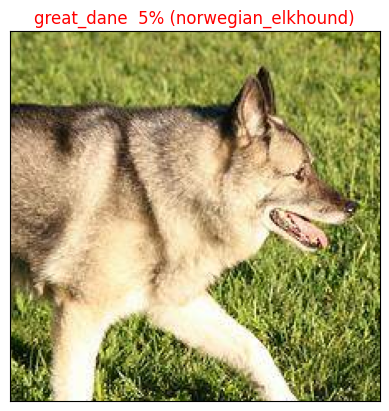

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = classNames[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

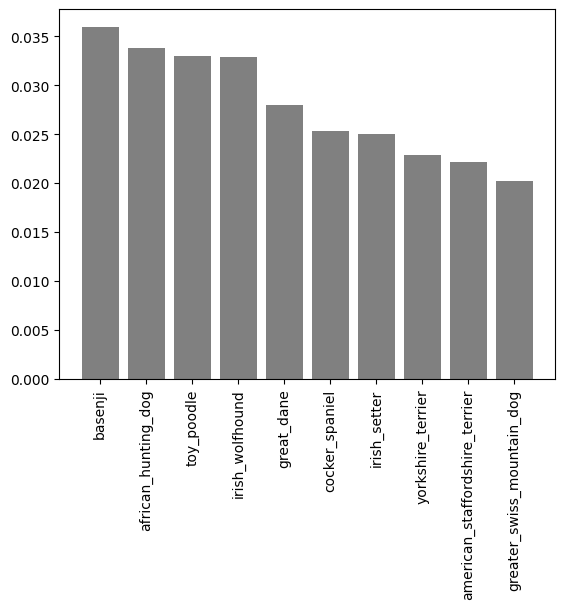

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

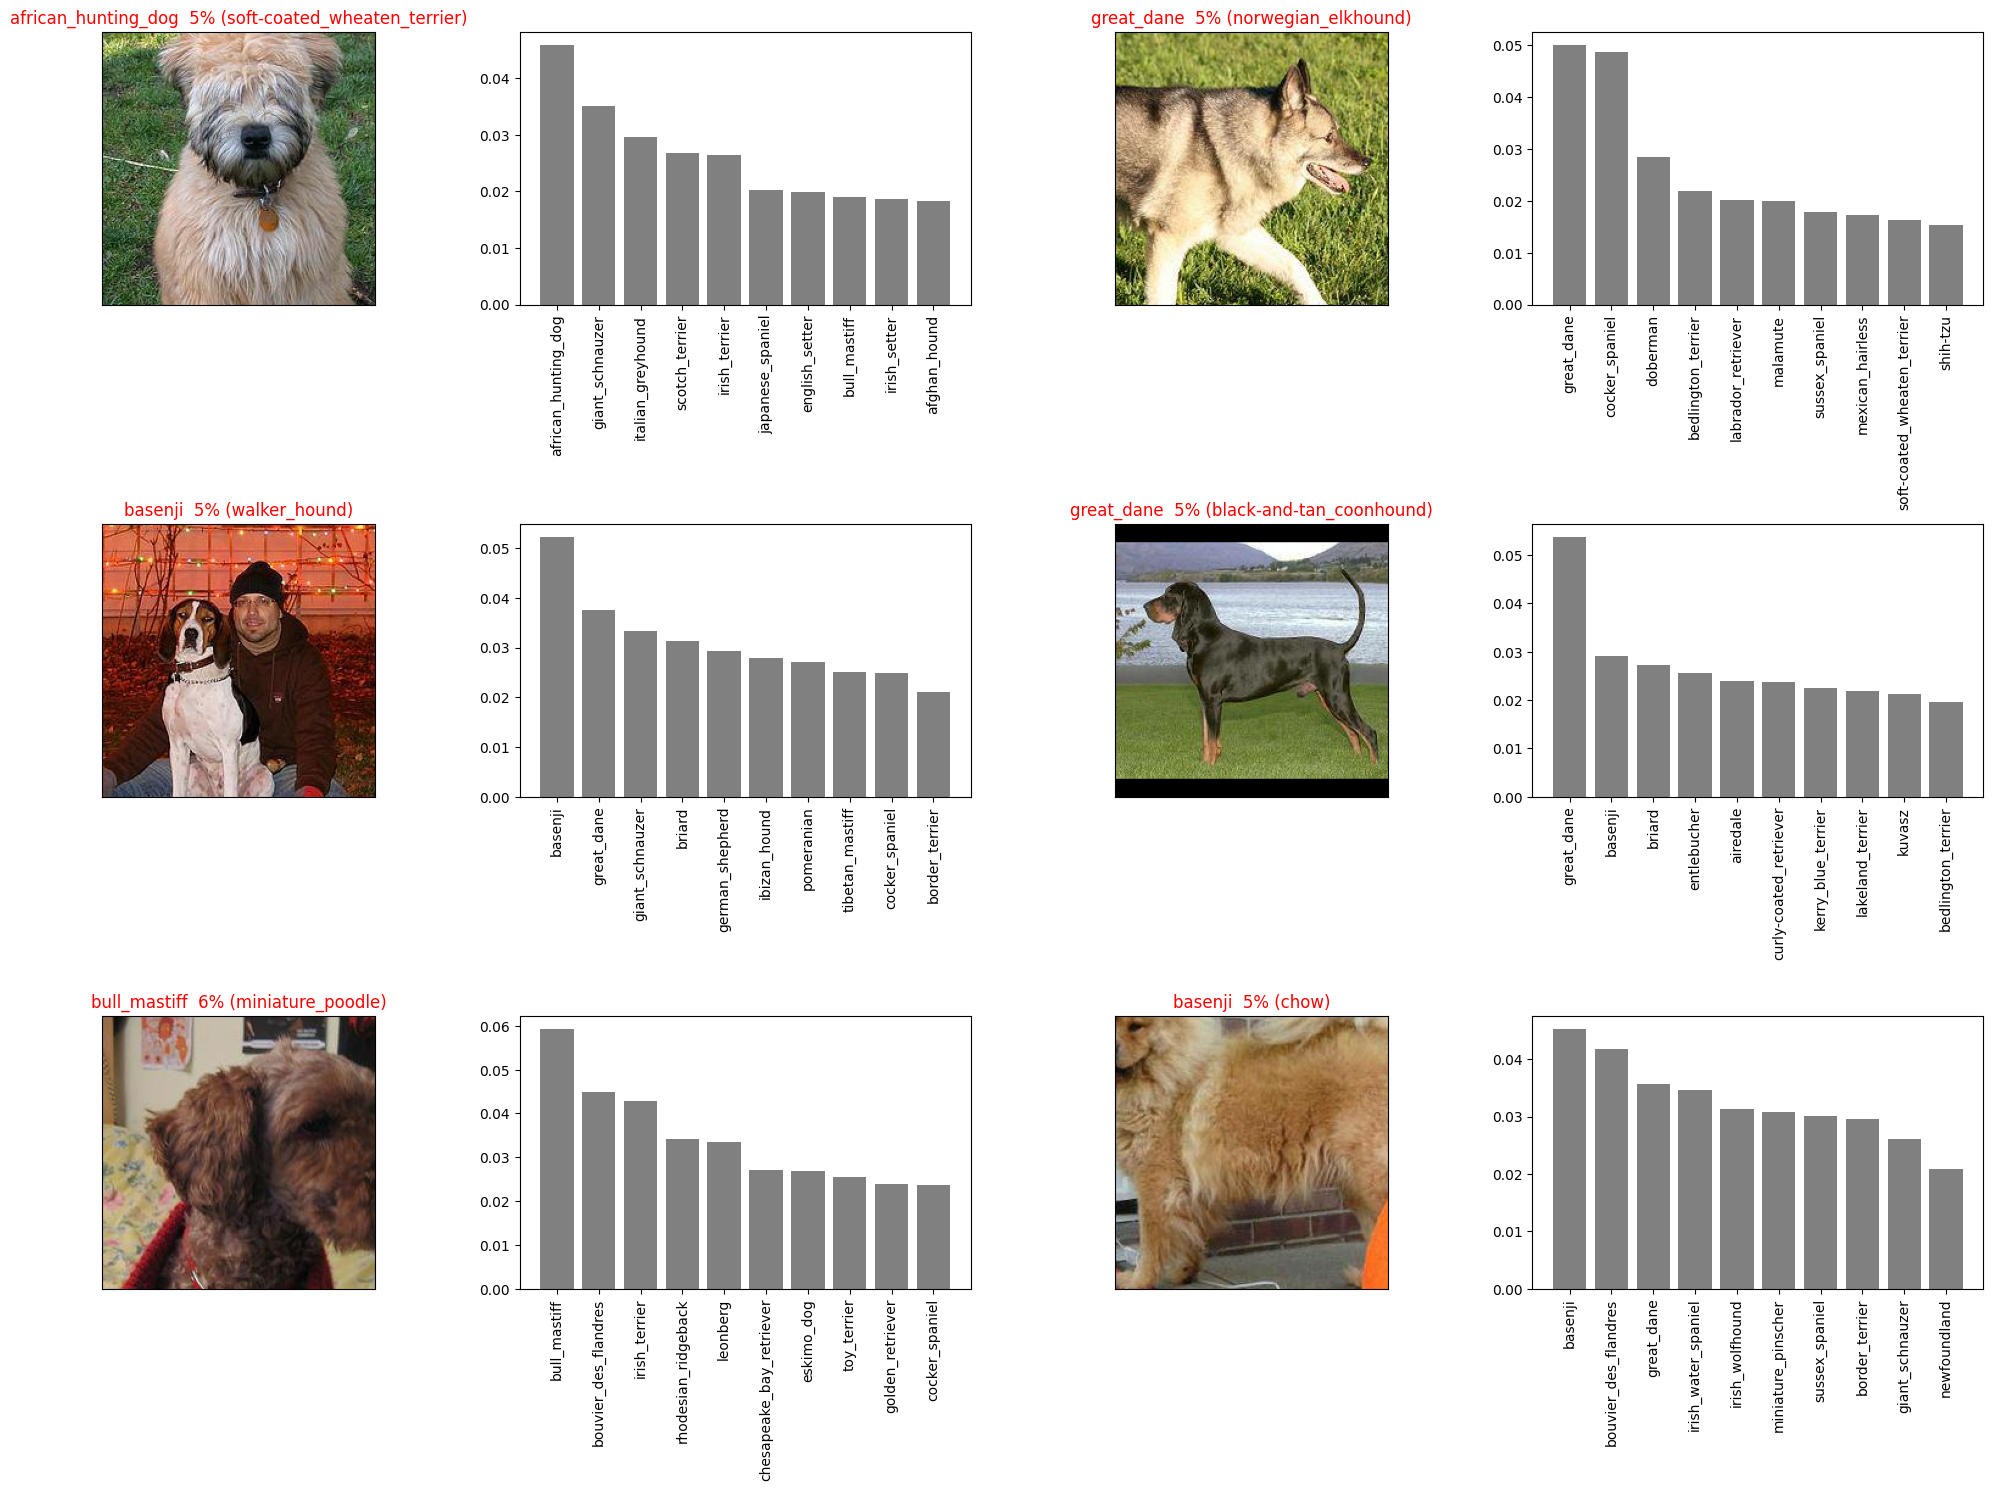

In [ ]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()
